## Homework3 Econ 425 Machine Learning
#### Jialong Feng
#### 01/26/2024

### Problem 2 <br>
#### The College.csv  dataset 
contains admissions data for a sample of 777 universities. We want to predict the number of applications received (‘Apps’) using the other variables in the dataset. <br>
(i) Let the first 600 observations be the training set and the remaining 177 observations be the
test set. <br>
(ii) Fit the OLS regression on the training set, and report the test error obtained. <br><br>
For the rest of the problem, let the penalization parameter vary on the 1000-point grid from 0.01
to 60. <br>
(iii) Fit the LASSO regression on the training set, with the penalization parameter chosen by
20-fold cross-validation. Report the test error obtained. <br>
(iv) Fit the ridge regression on the training set, with the penalization parameter chosen by leave-
one-out cross-validation. Report the test error obtained. <br>
(v) Which of the three models do you prefer? Is there much difference among the test errors?



In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import io
import sys
import requests
#PREVIOUS indicator:
alphas_lasso = False
alphas_ridge = False

In [29]:
url = "https://raw.githubusercontent.com/BACCHUS2333/Machine_Learning_Lasso_and_ridge_regression.github.io/main/College.csv"
#import data from this URL using requests
import pandas as pd
import io
import requests
s=requests.get(url).content
college_data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [30]:


#print(college_data.shape)
#transform private variables into binary
college_data['Private'] = college_data['Private'].apply(lambda x: 1 if x == 'Yes' else 0)
college_data.fillna(method='backfill')

#jacob@pattern.com

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


## 1. OLS

In [31]:
#set 600 observations as train dataset
train_college_ols = college_data.iloc[:600,:]
test_college_ols = college_data.iloc[600:,:]
print("train_college_ols.shape,test_college_ols.shape")
train_college_ols.shape,test_college_ols.shape

train_college_ols.shape,test_college_ols.shape


((600, 18), (177, 18))

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#seperate x and y with apps as y
y_train_ols = train_college_ols['Apps']
x_train_ols = train_college_ols.drop(['Apps'],axis=1)
y_test_ols = test_college_ols['Apps']
x_test_ols = test_college_ols.drop(['Apps'],axis=1)

ols = LinearRegression()
result = ols.fit(x_train_ols,y_train_ols)
y_test_predict_ols = result.predict(x_test_ols)
#calculate the RSE
RSE = np.sqrt(np.sum((y_test_predict_ols-y_test_ols)**2)/(len(y_test_ols)-2))
#calculate the test error
test_error_ols = np.mean((y_test_predict_ols-y_test_ols)**2)
test_error_ols
#


1502077.4348215673

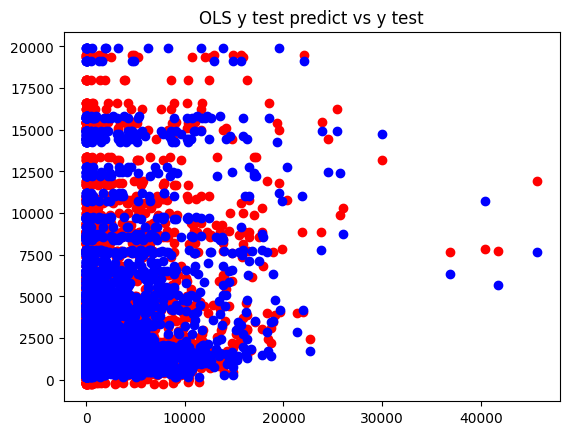

<Figure size 640x480 with 0 Axes>

In [33]:
plt.plot(x_test_ols,y_test_predict_ols,'ro')
plt.plot(x_test_ols,y_test_ols,'bo')
plt.title('OLS y test predict vs y test')
plt.show()
plt.savefig('OLS y test predict vs y test.jpg')

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso

#set Lasso regression with alpha = 0.5
lasso = Lasso()
lasso.alpha = 0.5
cross_val_score(lasso, x_test_ols, y_test_ols, cv=20, scoring='neg_mean_squared_error')

array([-4179900.18157457,  -868895.48810043, -1959178.98640651,
        -440391.81435222, -1267348.07396757, -1973722.14953985,
        -792017.97716927,  -618469.94515965,  -195585.20982248,
        -509829.7504144 , -4896356.01907258,  -372643.38014067,
        -377264.0668589 ,  -337550.37885516, -1183259.12600424,
       -1512953.99433907, -1348948.70043935,  -350530.6089135 ,
        -149497.05574035, -1744656.51884283])

In [35]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
#write a function of LASSO regression
#alphas_lasso = True
def lasso_regression(X, y):
    lasso = Lasso()
    if alphas_lasso:
        alphas = np.linspace(0.01, 60, 1000)
    else:
        alphas  = [0.01, 0.1, 1, 10, ]
    scores_across_alpha = pd.DataFrame(columns=['alpha', 'mean_score','median_score','max_score','min_score'])
    
    for alpha in alphas:
        lasso.alpha = alpha
        scores = cross_val_score(lasso, X, y, cv=20, scoring='neg_mean_squared_error')
        mean_score = -np.mean(scores)
        median_score = -np.median(scores)
        max_score = -np.max(scores)
        min_score = -np.min(scores)
        scores_across_alpha = scores_across_alpha.append({'alpha':alpha, 'mean_score':mean_score,'median_score':median_score,'max_score':max_score,'min_score':min_score}, ignore_index=True)
        
    return scores_across_alpha


features function label
label: maximize time spent on an app
features: duolinggo, likely knowledge

Zillow 


/var/folders/_b/4lj1bh0s4473m5xx061k14lc0000gn/T/ipykernel_31538/4028972685.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_across_alpha = scores_across_alpha.append({'alpha':alpha, 'mean_score':mean_score,'median_score':median_score,'max_score':max_score,'min_score':min_score}, ignore_index=True)
/var/folders/_b/4lj1bh0s4473m5xx061k14lc0000gn/T/ipykernel_31538/4028972685.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_across_alpha = scores_across_alpha.append({'alpha':alpha, 'mean_score':mean_score,'median_score':median_score,'max_score':max_score,'min_score':min_score}, ignore_index=True)
/var/folders/_b/4lj1bh0s4473m5xx061k14lc0000gn/T/ipykernel_31538/4028972685.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

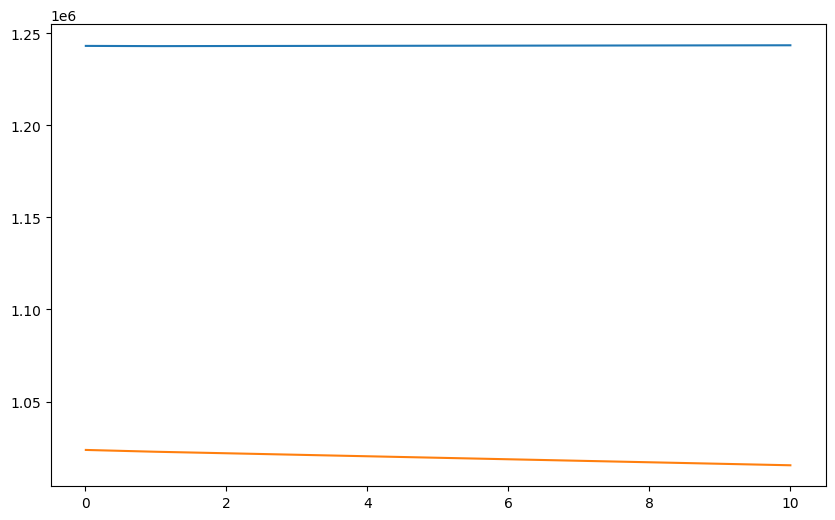

best alpha:  1.0


In [36]:
scores_across_alpha = lasso_regression(x_train_ols,y_train_ols)

#plot the scores across alpha
plt.figure(figsize=(10,6))
plt.plot(scores_across_alpha['alpha'], scores_across_alpha['mean_score'], label='mean_score')
plt.plot(scores_across_alpha['alpha'], scores_across_alpha['median_score'], label='median_score')
plt.show()
best_alpha_lasso = scores_across_alpha.loc[scores_across_alpha['mean_score'].idxmin()]['alpha']
print('best alpha: ', best_alpha_lasso)

In [37]:
scores_across_alpha

,alpha,mean_score,median_score,max_score,min_score
0,0.01,1.243134e+06,1.023721e+06,153657.511225,4.260909e+06
1,0.10,1.243122e+06,1.023630e+06,153632.492757,4.260440e+06
2,1.00,1.243016e+06,1.022735e+06,153404.361201,4.255787e+06
3,10.00,1.243472e+06,1.015389e+06,153328.396322,4.210259e+06


## 3 leave one out ridige regression

In [38]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import LeaveOneOut
#alphas_ridge = True
def ridge_regression(X, y,x_test,y_test):
    ridge = RidgeCV(cv=LeaveOneOut())
    if alphas_ridge:
        alphas = np.linspace(0.01, 60, 1000)
    else:
        alphas = [0.01,0.1,1,10]
    scores_across_alpha_ridge = pd.DataFrame(columns=['alpha', 'mean_score','test_error','coefficients'])
    for alpha in alphas:
        ridge.alpha_ = alpha
        ridge.fit(X, y)
        score = ridge.score(X, y)
        test_error_ridge = np.mean((ridge.predict(x_test)-y_test)**2)
        scores_across_alpha_ridge = scores_across_alpha_ridge.append({'alpha':alpha, 'mean_score':score,'test_error': test_error_ridge,'coefficients':ridge.coef_}, ignore_index=True)
        #calculate the test error
        

        #scores = cross_val_score(ridge, X, y, cv=20, scoring='neg_mean_squared_error')
        
    return scores_across_alpha_ridge


In [39]:
scores_across_alpha_ridge = ridge_regression(x_train_ols,y_train_ols,x_test_ols,y_test_ols)
best_alpha_ridge = scores_across_alpha_ridge.loc[scores_across_alpha_ridge['mean_score'].idxmax()]['alpha']
print('best alpha: ', best_alpha_ridge)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.f

best alpha:  0.01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.f

In [40]:
scores_across_alpha_ridge

,alpha,mean_score,test_error,coefficients
0,0.01,0.927127,1.502072e+06,"[-492.21902278053005, 1.723397694701631, -1.22..."
1,0.10,0.927127,1.502072e+06,"[-492.21902278053005, 1.723397694701631, -1.22..."
2,1.00,0.927127,1.502072e+06,"[-492.21902278053005, 1.723397694701631, -1.22..."
3,10.00,0.927127,1.502072e+06,"[-492.21902278053005, 1.723397694701631, -1.22..."


In [41]:
print("best_alpha_ridge: ",best_alpha_ridge)

best_alpha_ridge:  0.01


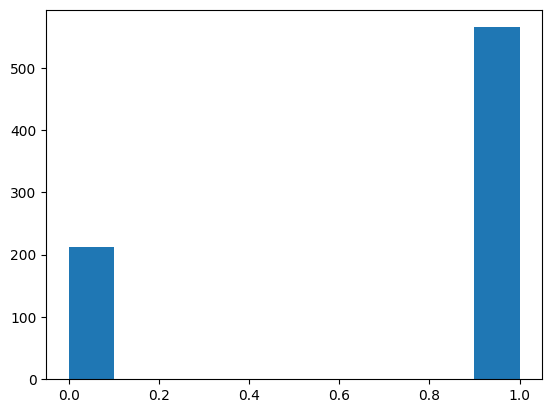

<Figure size 640x480 with 0 Axes>

In [51]:
plt.hist(college_data['Private'])
plt.show()
plt.savefig('Private histogram.jpg')